## Import Library

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [178]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [179]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [180]:
# hapus id karena tidak dibutuhkan
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Eksploratory Data Analysis

In [182]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [183]:
df.describe(include='O')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


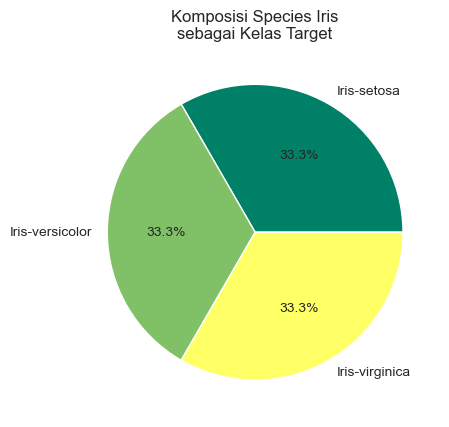

In [184]:
df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='summer')
plt.ylabel('')
plt.title('Komposisi Species Iris\nsebagai Kelas Target');

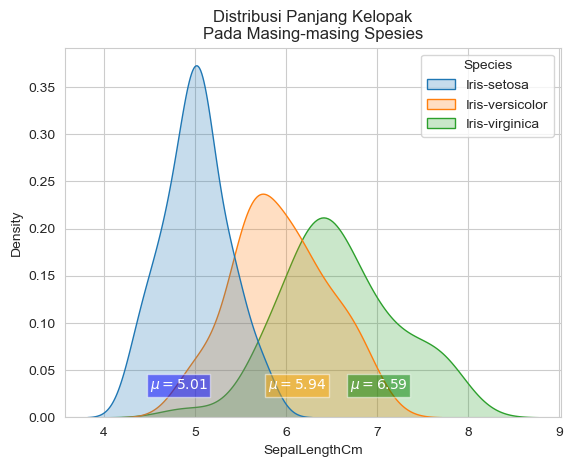

In [185]:
sns.kdeplot(data=df, x='SepalLengthCm', hue='Species', fill=True)
plt.text(4.5, 0.03, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-setosa']['SepalLengthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'blue', 'alpha': 0.5, 'pad': 2})
plt.text(5.8, 0.03, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-versicolor']['SepalLengthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 2})
plt.text(6.7, 0.03, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-virginica']['SepalLengthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'green', 'alpha': 0.5, 'pad': 2})
plt.title('Distribusi Panjang Kelopak\nPada Masing-masing Spesies');

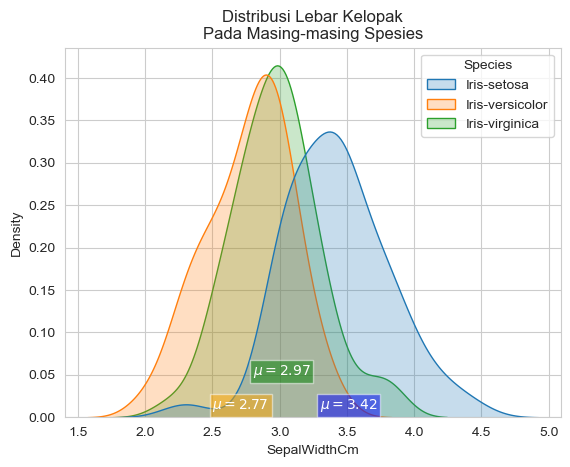

In [186]:
sns.kdeplot(data=df, x='SepalWidthCm', hue='Species', fill=True)
plt.text(3.3, 0.01, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-setosa']['SepalWidthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'blue', 'alpha': 0.5, 'pad': 2})
plt.text(2.5, 0.01, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-versicolor']['SepalWidthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 2})
plt.text(2.8, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-virginica']['SepalWidthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'green', 'alpha': 0.5, 'pad': 2})
plt.title('Distribusi Lebar Kelopak\nPada Masing-masing Spesies');

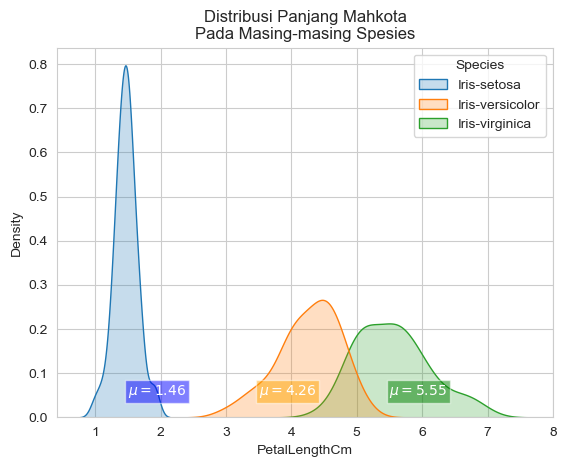

In [187]:
sns.kdeplot(data=df, x='PetalLengthCm', hue='Species', fill=True)
plt.text(1.5, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-setosa']['PetalLengthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'blue', 'alpha': 0.5, 'pad': 2})
plt.text(3.5, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-versicolor']['PetalLengthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 2})
plt.text(5.5, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-virginica']['PetalLengthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'green', 'alpha': 0.5, 'pad': 2})
plt.title('Distribusi Panjang Mahkota\nPada Masing-masing Spesies');

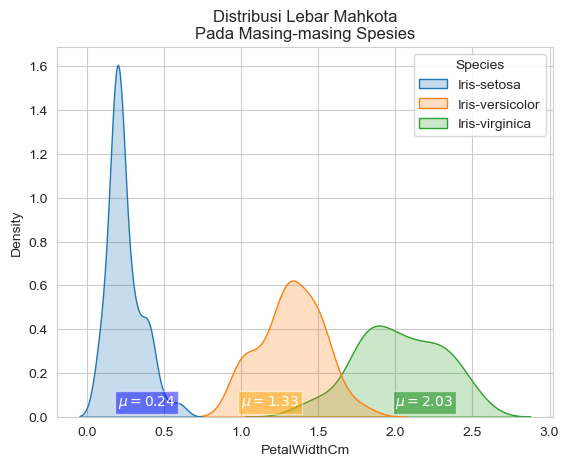

In [188]:
sns.kdeplot(data=df, x='PetalWidthCm', hue='Species', fill=True)
plt.text(0.2, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-setosa']['PetalWidthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'blue', 'alpha': 0.5, 'pad': 2})
plt.text(1, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-versicolor']['PetalWidthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 2})
plt.text(2, 0.05, r'$\mu={}$'.format('%.2f' % df[df['Species']=='Iris-virginica']['PetalWidthCm'].mean()), style='italic', color='white', bbox={
        'facecolor': 'green', 'alpha': 0.5, 'pad': 2})
plt.title('Distribusi Lebar Mahkota\nPada Masing-masing Spesies');

In [189]:
features = df.drop('Species', axis=1)

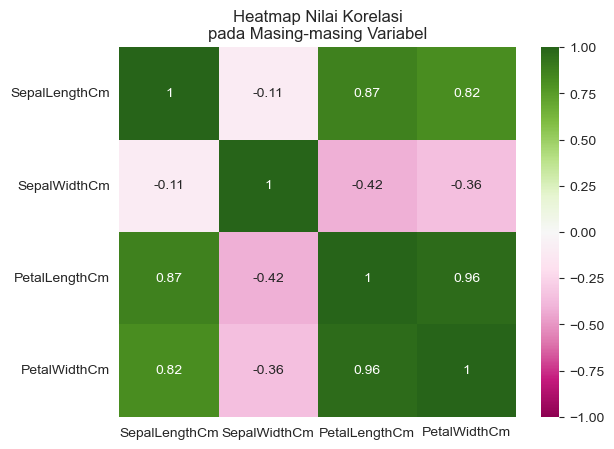

In [190]:
sns.heatmap(features.corr(), annot=True, cmap='PiYG', vmin=-1)
plt.title('Heatmap Nilai Korelasi\npada Masing-masing Variabel');

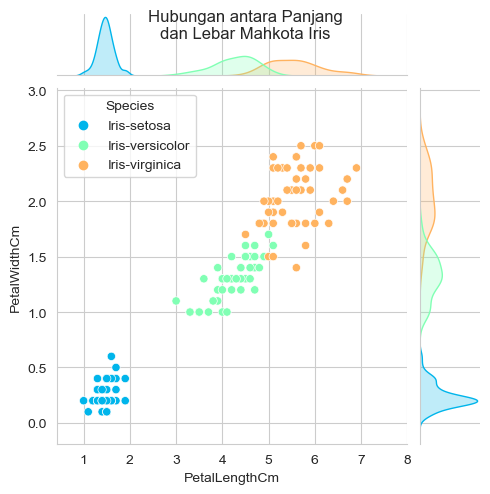

In [191]:
sns.jointplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='rainbow', height=5)
plt.suptitle('Hubungan antara Panjang\ndan Lebar Mahkota Iris');

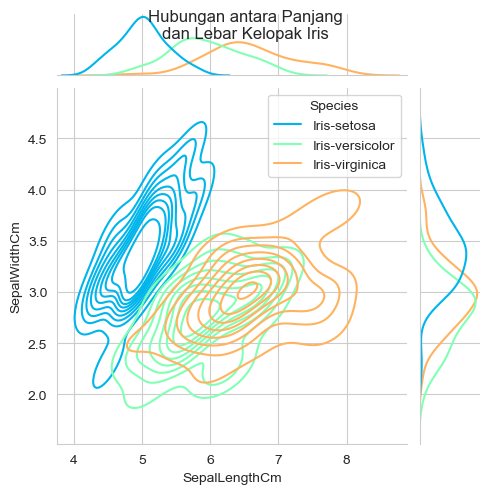

In [192]:
sns.jointplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species',kind='kde', palette='rainbow', height=5)
plt.suptitle('Hubungan antara Panjang\ndan Lebar Kelopak Iris');

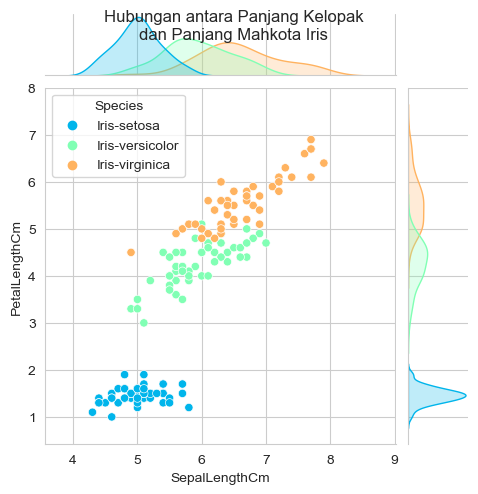

In [193]:
sns.jointplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='rainbow', height=5)
plt.suptitle('Hubungan antara Panjang Kelopak\ndan Panjang Mahkota Iris');

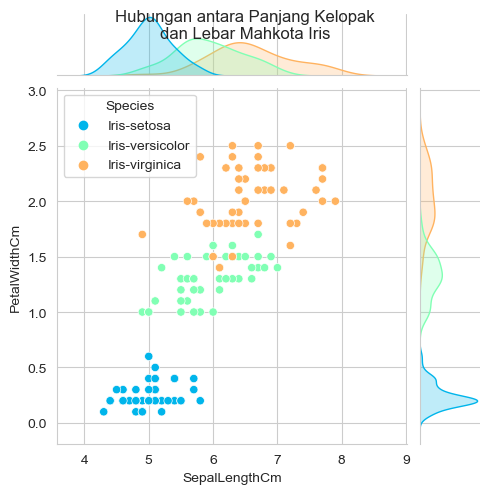

In [194]:
sns.jointplot(data=df, x='SepalLengthCm', y='PetalWidthCm', hue='Species', palette='rainbow', height=5)
plt.suptitle('Hubungan antara Panjang Kelopak\ndan Lebar Mahkota Iris');

## Data Preprocessing

### Menangani Missing Value

In [195]:
print('Jumlah missing value pada setiap kolom:')
df.isnull().sum()

Jumlah missing value pada setiap kolom:


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Tidak terdapat missing value

### Menangani data duplikat

In [196]:
duplikat = df.duplicated().sum()
print(f'terdapat {duplikat} data yang duplikat')

terdapat 3 data yang duplikat


In [197]:
df = df.drop_duplicates()

### Menangani Outlier

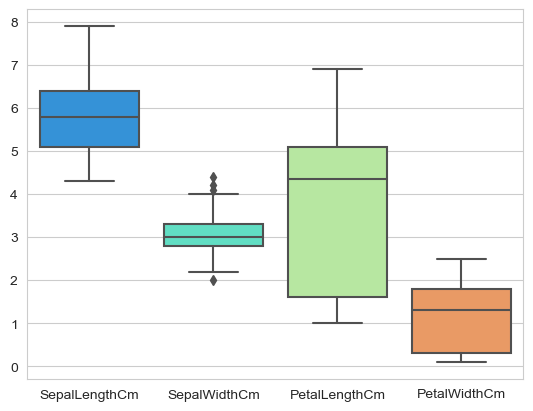

In [198]:
sns.boxplot(features, palette='rainbow');

**Berdasarkan boxplot di atas, tidak terdapat nilai outlier yang ekstream**

### Feature Encoding

In [199]:
label_encoding = {"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2}
df['Species'] = df['Species'].map(label_encoding)

In [200]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Modeling

**Train Test Split**

In [279]:
#Bagi data ke features dan label
X = df.drop('Species', axis=1) #Kolom Features
y = df['Species'] #Kolom class/label

# Split data ke training(75%) dan testing(25%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

### Regresi Logistik

In [280]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_predict = logmodel.predict(X_test)

In [281]:
acc = round(accuracy_score(y_test , log_predict) , 3)
print(f'Akurasi model regresi logistik adalah {acc}')

Akurasi model regresi logistik adalah 0.973


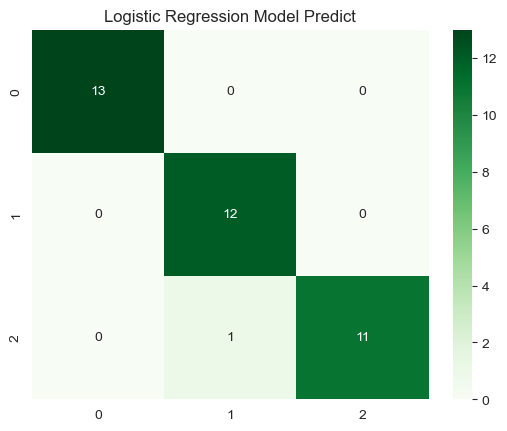

In [282]:
## confusion matrix
conf_mat = confusion_matrix(y_test, log_predict)
sns.heatmap(conf_mat, annot=True,fmt="g", cmap='Greens')
plt.title('Logistic Regression Model Predict')
plt.show()

### Decision Tree

In [283]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

In [284]:
acc = round(accuracy_score(y_test , dtc_predict) , 3)
print(f'Akurasi model Decision Tree adalah {acc}')

Akurasi model Decision Tree adalah 0.973


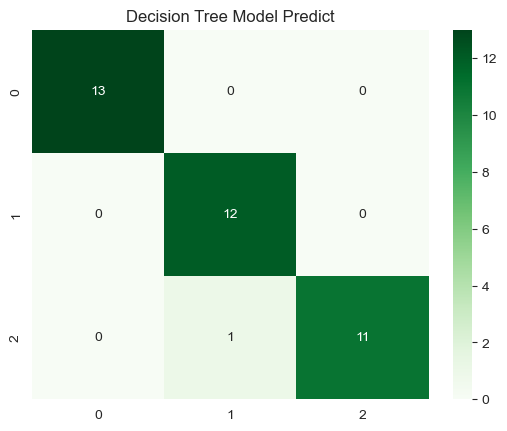

In [285]:
## confusion matrix
conf_mat = confusion_matrix(y_test, dtc_predict)
sns.heatmap(conf_mat, annot=True,fmt="g", cmap='Greens')
plt.title('Decision Tree Model Predict')
plt.show()

### Random Forest

In [286]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [287]:
acc = round(accuracy_score(y_test , rf_predict) , 3)
print(f'Akurasi model Random Forest adalah {acc}')

Akurasi model Random Forest adalah 0.973


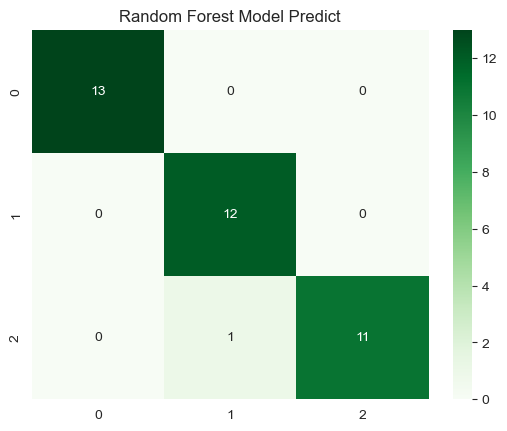

In [288]:
## confusion matrix
conf_mat = confusion_matrix(y_test, rf_predict)
sns.heatmap(conf_mat, annot=True,fmt="g", cmap='Greens')
plt.title('Random Forest Model Predict')
plt.show()

**Dari ketiga model tersebut didapatkan akurasi yang sama yaitu 97,3%. Sehingga semua model dapat dipilih untuk melakukan prediksi**

# Thank You